In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

%matplotlib inline
plt.rcParams["font.family"] = "Malgun Gothic"
plt.rcParams["font.size"] = 15
plt.rcParams["figure.figsize"] = (16,9)
plt.rcParams["axes.unicode_minus"] = False
plt.style.use("ggplot")

# 0.Data Load
---

In [2]:
df_customer = pd.read_csv("../LPOINT_BIG_COMP/LPOINT_BIG_COMP_01_DEMO.csv")
df_customer.head()

,cust,ma_fem_dv,ages,zon_hlv
0,M000034966,여성,40대,Z07
1,M000059535,여성,30대,Z12
2,M000136117,여성,30대,Z11
3,M000201112,여성,50대,Z17
4,M000225114,여성,40대,Z17


In [3]:
df_customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29913 entries, 0 to 29912
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   cust       29913 non-null  object
 1   ma_fem_dv  29913 non-null  object
 2   ages       29913 non-null  object
 3   zon_hlv    29913 non-null  object
dtypes: object(4)
memory usage: 934.9+ KB


# 1.Values
---

In [4]:
# Number of Unique Values
for col in df_customer.columns:
    unq_arr = df_customer[col].unique()
    print(f"{col}: {df_customer[col].nunique()}\t{['*']+unq_arr[:10] if df_customer[col].nunique()>20 else unq_arr}")
    print()
print(f"Total DF Length: {len(df_customer)}")

cust: 29913	['*M000034966' '*M000059535' '*M000136117' '*M000201112' '*M000225114'
 '*M000261625' '*M000350564' '*M000419293' '*M000494848' '*M000504230']

ma_fem_dv: 2	['여성' '남성']

ages: 6	['40대' '30대' '50대' '60대' '20대' '70대']

zon_hlv: 17	['Z07' 'Z12' 'Z11' 'Z17' 'Z10' 'Z05' 'Z16' 'Z03' 'Z06' 'Z14' 'Z01' 'Z04'
 'Z09' 'Z15' 'Z08' 'Z13' 'Z02']

Total DF Length: 29913


In [5]:
# Missing Value
df_customer.isna().sum()

cust         0
ma_fem_dv    0
ages         0
zon_hlv      0
dtype: int64

In [17]:
PK = "cust"

for col in df_customer.drop([PK], axis=1).columns:
    print(df_customer[col].value_counts().sort_index())

남성     9830
여성    20083
Name: ma_fem_dv, dtype: int64
20대    3853
30대    7736
40대    9863
50대    5633
60대    2115
70대     713
Name: ages, dtype: int64
Z01     474
Z02     103
Z03     600
Z04    1750
Z05     576
Z06    1080
Z07     204
Z08     739
Z09     642
Z10    8157
Z11    1840
Z12     803
Z13     896
Z14     988
Z15     677
Z16    2503
Z17    7881
Name: zon_hlv, dtype: int64


# 2.Visualization
---

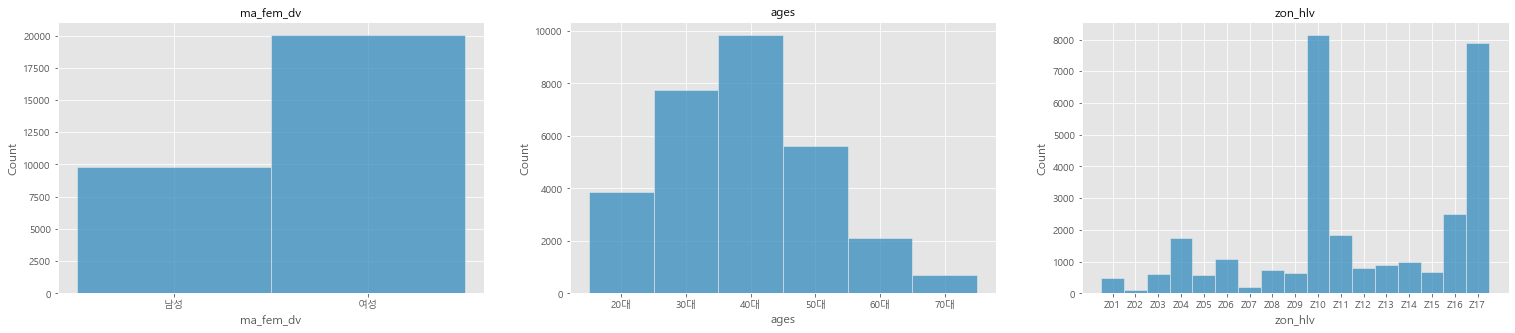

In [12]:
# histogram
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(26,5))

for i, col in enumerate(df_customer.drop([PK], axis=1).columns):
    sns.histplot(ax=ax[i], data=df_customer[col].sort_values())
    ax[i].set_title(col, size=12)
plt.show()

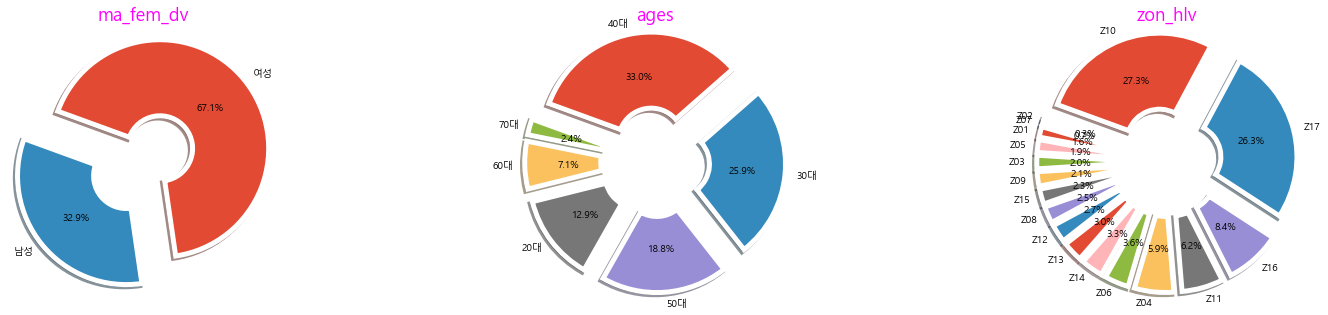

In [39]:
# pie chart
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(26,5))
for i, col in enumerate(df_customer.drop(PK, axis=1).columns):
    vcs = df_customer[col].value_counts()
    explode = [0.2]*len(vcs)
    wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 5}
    ax[i].pie(vcs, labels=vcs.index, autopct='%.1f%%', startangle=160, counterclock=False, explode=explode, shadow=True, wedgeprops=wedgeprops)
    ax[i].set_title(col, size=18, color="magenta")
plt.show()

# 3.Simple Result
---

- <span style="color:magenta">성별</span>의 경우 `여성 67.1%`, `남성 32.9%`로 여성 이용 고객이 많음을 쉽게 확인할 수 있음
- <span style="color:magenta">연령</span>의 경우 연령대에 따라 분포가 형성되는데 가장 많은 이용자 층은 `30-40대`층임
- 이는 구매 품목과 연관지어 확인한다면 더 이용자 층 분류가 가능할 것으로 여겨짐
- <span style="color:magenta">지역</span>의 경우 `시도(광역,특별시)` 갯수로 추측은 할 수 있으나, 마스킹이 되어 있기에 명확히 지역을 특정 지을 수는 없음